# **Twitter Validation Using NLP**

Importing Libraries

In [140]:
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
import matplotlib.pyplot as plt

Read Dataset

In [141]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/twitter_validation.csv',names=['id','location','target','text'])
df

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


Check for missing values

In [142]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [143]:
df.dtypes

id           int64
location    object
target      object
text        object
dtype: object

In [144]:
df.shape

(1000, 4)

In [145]:
tar=df['target'].value_counts()
tar

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

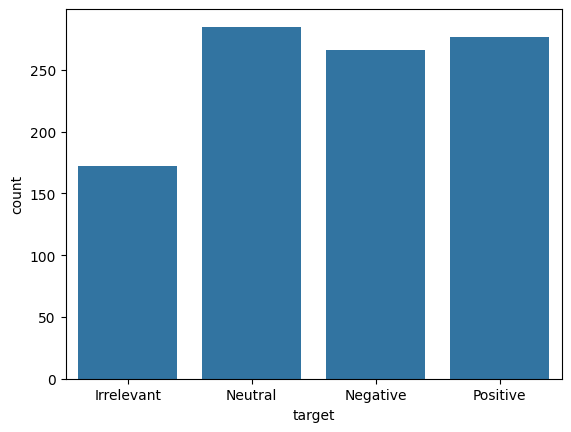

In [146]:
sns.countplot(x='target',data=df)
plt.show()

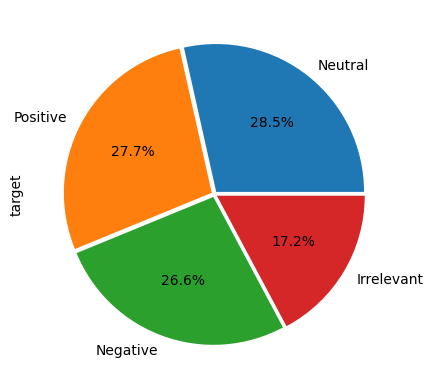

In [147]:
tar.plot(kind='pie',explode=(0.02,0.02,0.02,0.02),autopct='%1.1f%%')
plt.show()

In [148]:
df.drop(['id','location'],axis=1,inplace=True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [149]:
df = df[df['target'] != 'Irrelevant']
df

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [150]:
#Reset index values
df = df.reset_index(drop=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [151]:
df['target'].value_counts()

Neutral     285
Positive    277
Negative    266
Name: target, dtype: int64

In [152]:
df['target'] = df['target'].map({'Positive': 1,'Negative':-1,'Neutral': 0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [153]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [154]:
#Removing special character
tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")

<ipython-input-154-1a0e453f0b5e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")


In [155]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [156]:
#SnowballStemmer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [157]:
tweets=tweets.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:" ".join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [158]:
nltk.download('stopwords')
sw=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
tweets=tweets.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:" ".join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: text, Length: 828, dtype: object

In [160]:
#Vectorization
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(tweets)
#print(X)

In [161]:
vectorizer.get_feature_names_out()

array(['00', '00016', '005', ..., 'ztl', 'zyot', 'zysola'], dtype=object)

In [162]:
X.shape

(828, 3931)

In [163]:
y=df['target']
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: target, Length: 828, dtype: int64

In [164]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [165]:
rf=RandomForestClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)
knn=KNeighborsClassifier()
sv=SVC()

In [166]:
lst=[rf,ad,knn,sv]
for i in lst:
  print('******',i,'******')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))
  y.value_counts()

****** RandomForestClassifier(random_state=1) ******
              precision    recall  f1-score   support

          -1       0.49      0.74      0.59        74
           0       0.61      0.59      0.60        91
           1       0.59      0.35      0.44        84

    accuracy                           0.55       249
   macro avg       0.57      0.56      0.54       249
weighted avg       0.57      0.55      0.54       249

****** AdaBoostClassifier(random_state=1) ******
              precision    recall  f1-score   support

          -1       0.49      0.27      0.35        74
           0       0.44      0.78      0.56        91
           1       0.54      0.30      0.38        84

    accuracy                           0.47       249
   macro avg       0.49      0.45      0.43       249
weighted avg       0.49      0.47      0.44       249

****** KNeighborsClassifier() ******
              precision    recall  f1-score   support

          -1       0.38      0.80      0.51 

In [167]:
#New prediction
y_new=sv.predict(vectorizer.transform(['today suck time drink wine n play borderland s']))
y_new

array([1])